## Data Collection

In [ ]:
#This is a sample code which we used to collect the data

subreddit = 'melbourne'
limit = 500

csv_file = open('fxxx.csv', 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Author', 'Title', 'Score', 'Num_Comments'])

for i in range(5): #collects the data in 20 attemps
    print(f"Retrieving page {i+1}")
    posts = []
    for submission in client.subreddit(subreddit).hot(limit=limit):
        posts.append([timestamp, submission.author, submission.title, submission.score, submission.num_comments] + top_comments_data)
        
    csv_writer.writerows(posts)
    time.sleep(1)

csv_file.close()

In [ ]:
import pandas as pd
# This is the dataset we collected from kaggel
data_tw= pd.read_csv('twitter_dataset.csv')

# Display the first few rows (default is 5 rows)
print(data_tw.head())

In [ ]:
# Filter rows - contains Melbourne
melbourne_df = data_tw[data_tw['file_name'].str.contains('Melbourne', case=False, na=False)].head(10000)

# Filter rows - contains Sydney
sydney_df = data_tw[data_tw['file_name'].str.contains('Sydney', case=False, na=False)].head(10000)

# Define a list of columns to drop
columns_to_drop = ['group_name', 'followers', 'friends', 'location', 'search_query', 'twitter_id', 'polarity', 'partition_0', 'partition_1', 'username']

melbourne_df = melbourne_df.drop(columns=columns_to_drop)
sydney_df = sydney_df.drop(columns=columns_to_drop)

filtered_df = pd.concat([melbourne_df, sydney_df], ignore_index=True)

#filtered_df.insert(0, 'Source', 'Twitter') #insert a column named source

In [ ]:
print(filtered_df.head()) #examine the data

In [ ]:
# rename the columns name to match with our data
column_mapping = {
    'created_at': 'Timestamp',
    'file_name': 'Location',
    'screenname': 'Author',
    'text': 'Title',
    'retweet_count': 'Score'
}

filtered_df.rename(columns=column_mapping, inplace=True)
# Extract only the date portion from the Timestamp column
filtered_df['Timestamp'] = filtered_df['Timestamp'].str.slice(0, 10)

In [ ]:
filtered_df.to_csv('filtered_twitter_data.csv', index=False)
print(filtered_df.head()) # examine the data

In [ ]:
df_melb= pd.read_csv('melbourne_subreddit.csv')
df_syd= pd.read_csv('sydney_subreddit.csv')
#df_melb.insert(1, 'Location', 'Melbourne')# add location and source 
#df_melb.insert(0, 'Source', 'Reddit')
#df_syd.insert(1, 'Location', 'Sydney')
#df_syd.insert(0, 'Source', 'Reddit')

print(df_melb.head())
print(df_syd.head())
df_melb.to_csv('melbourne_subreddit.csv', index=False)
df_syd.to_csv('sydney_subreddit.csv', index=False)

In [ ]:
melbournesub_df = pd.read_csv('melbourne_subreddit.csv')
sydneysub_df = pd.read_csv('sydney_subreddit.csv')
twitter_dataset_df = pd.read_csv('filtered_twitter_data.csv')
#merge the data 
melbournesub_df.to_csv('final.csv', mode='w', header=True, index=False)
sydneysub_df.to_csv('final.csv', mode='a', header=False, index=False)
twitter_dataset_df.to_csv('final.csv', mode='a', header=False, index=False)


## Preprocessing and Data Cleaning

In [5]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('final.csv')

# Initialize the stemmer and define stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'\@\w+|\#','', text)
    # Remove non-English characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and apply stemming
    filtered_tokens = [stemmer.stem(w) for w in tokens if w not in stop_words and w.isalnum()]
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'Title' column
df['Processed_Title'] = df['Title'].apply(preprocess_text)

# Save the preprocessed DataFrame to a new CSV file
df.to_csv('preprocessed_cleaned.csv', index=False)

# Optionally, you can display the first few rows to observe the changes
print(df.head())


   Source   Timestamp   Location            Author  \
0  Reddit  19/10/2023  Melbourne  Dropkickedasakid   
1  Reddit  19/10/2023  Melbourne            al0678   
2  Reddit  19/10/2023  Melbourne            Olpper   
3  Reddit  19/10/2023  Melbourne    Unhappy-Singer   
4  Reddit  19/10/2023  Melbourne      RembyNoodles   

                                               Title  Score  \
0  New to Melbourne, need suggestions for a chill...      1   
1         Is it legal to work out barefoot in a gym?      1   
2                Rental repairs legal advice needed.      1   
3                                CBD Weekend Parking      1   
4                    Fenced dog park recommendations      0   

                                     Processed_Title  
0  new melbourn need suggest chill date eveningnight  
1                            legal work barefoot gym  
2                     rental repair legal advic need  
3                                   cbd weekend park  
4                    

## Initial Exploration

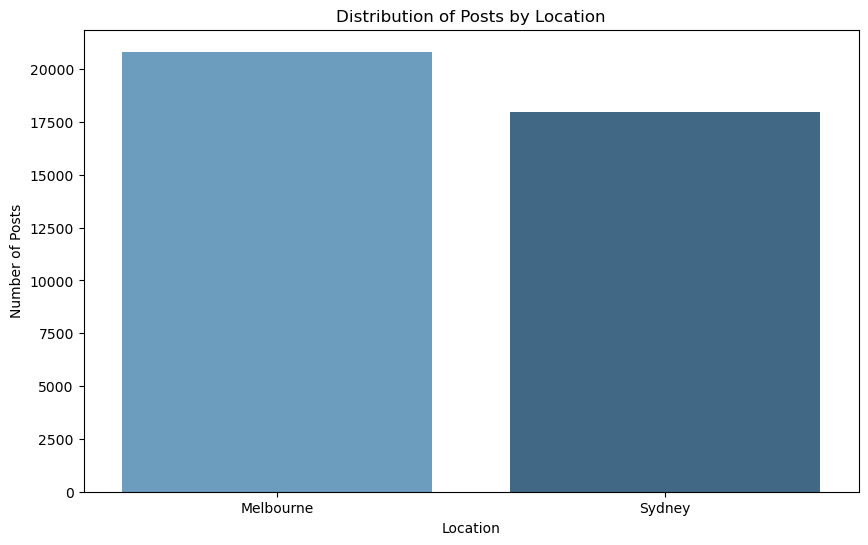

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of posts by location
location_counts = df['Location'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="Blues_d")
plt.title('Distribution of Posts by Location')
plt.xlabel('Location')
plt.ylabel('Number of Posts')
plt.show()


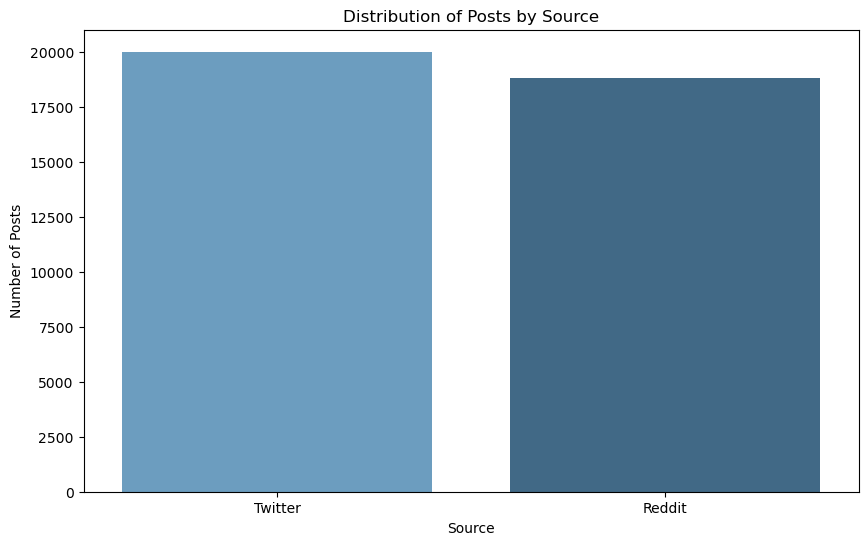

In [19]:
# Count the number of posts by source
source_counts = df['Source'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, palette="Blues_d")
plt.title('Distribution of Posts by Source')
plt.xlabel('Source')
plt.ylabel('Number of Posts')
plt.show()


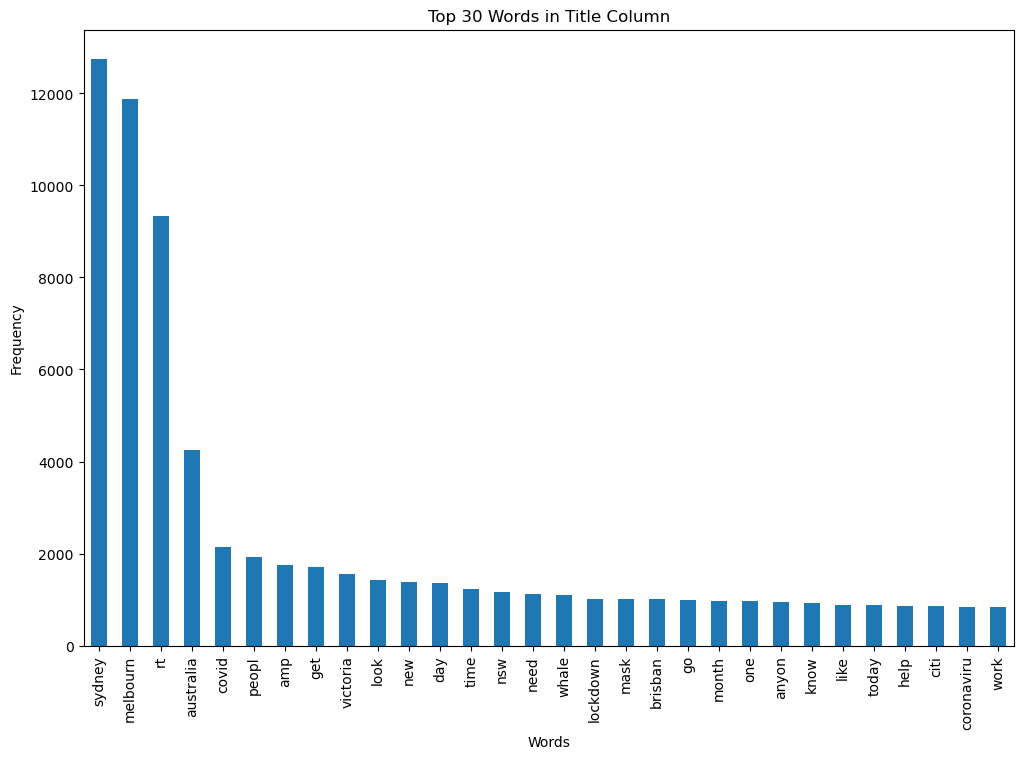

In [20]:
# Count the occurrence of each word
word_count = df['Processed_Title'].str.split(expand=True).stack().value_counts()

# Select top 30 words
top_words = word_count.head(30)

# Plot the top 30 words
plt.figure(figsize=(12, 8))
top_words.plot(kind='bar')
plt.title('Top 30 Words in Title Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


## Network graph

In [ ]:
import community  
from collections import defaultdict

subreddit = client.subreddit('melbourne')

G = nx.Graph()

for submission in subreddit.hot(limit=50):
    submission.comments.replace_more(limit=None)
    if len(submission.comments.list()) >= 8:  
        for i, comment in enumerate(submission.comments.list()):
            if i < 20:  # top 20 comments per post
                if comment.author:
                    author = str(comment.author)
                    parent_author = str(comment.parent().author) if comment.parent() and comment.parent().author else None
                    if parent_author and parent_author != author:
                        G.add_edge(parent_author, author)

# Detect communities
partition = community.best_partition(G)

# Visualizing the network graph with node clustering
plt.figure(figsize=(24, 16))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=20, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("User Interaction Network in r/melbourne", size=15)
plt.show()

In [ ]:
import community
from collections import defaultdict

subreddit = client.subreddit('sydney')

G = nx.Graph()

for submission in subreddit.hot(limit=50):
    submission.comments.replace_more(limit=None)
    if len(submission.comments.list()) >= 8:  
        for i, comment in enumerate(submission.comments.list()):
            if i < 20:  # top 20 comments per post
                if comment.author:
                    author = str(comment.author)
                    parent_author = str(comment.parent().author) if comment.parent() and comment.parent().author else None
                    if parent_author and parent_author != author:
                        G.add_edge(parent_author, author)

# Detect communities
partition = community.best_partition(G)
partition = community.best_partition(G)

# Visualizing the network graph with node clustering
plt.figure(figsize=(24, 16))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=20, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("User Interaction Network in r/sydney", size=15)
plt.show()

## Topic Modelling

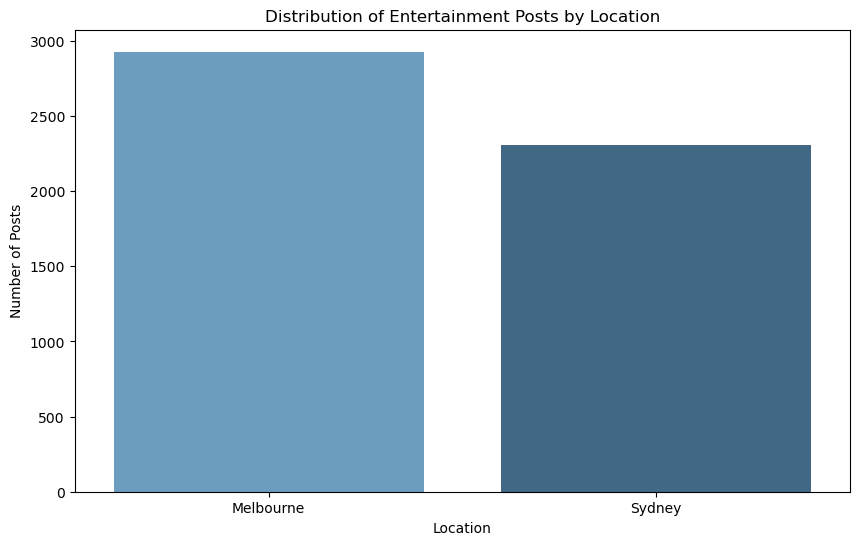

Melbourne    2928
Sydney       2309
Name: Location, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Keywords related to entertainment
entertainment_keywords = [
    'Concert',
    'Movie',
    'Theatre',
    'Park',
    'Music',
    'Festival',
    'Show',
    'Performance',
    'Entertainment',
    'Event',
    'Audience',
    'Tickets',
    'Film',
    'Screening',
    'Cinema',
    'Artists',
    'Stage',
    'Spectacle',
    'Band',
    'Recreation',
    'Art',
    'Gallery'
    'Sports',
    'Game',
    'hobby'
]


# Filter out posts related to entertainment
entertainment_df = df[df['Processed_Title'].str.contains('|'.join(entertainment_keywords), case=False, na=False, regex=True)]

# Count posts by location
entertainment_counts = entertainment_df['Location'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=entertainment_counts.index, y=entertainment_counts.values, palette="Blues_d")
plt.title('Distribution of Entertainment Posts by Location')
plt.xlabel('Location')
plt.ylabel('Number of Posts')
plt.show()

entertainment_counts


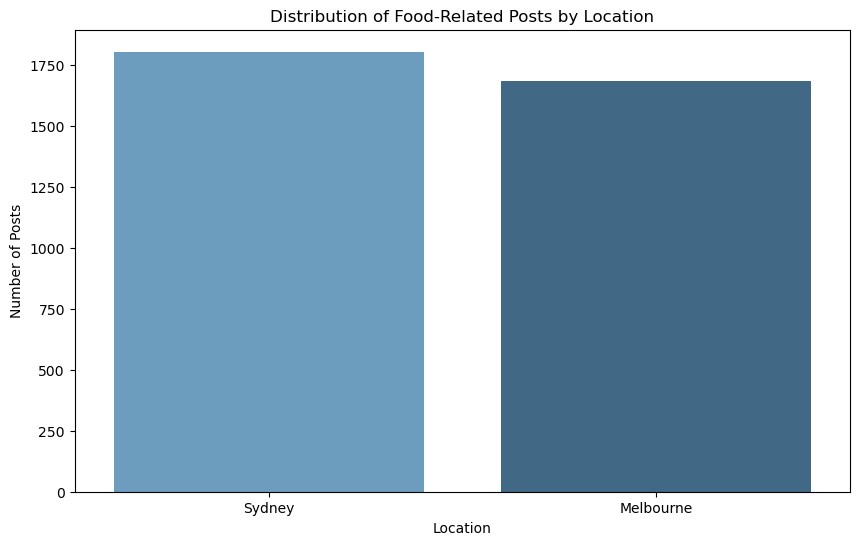

Sydney       1805
Melbourne    1685
Name: Location, dtype: int64

In [22]:
# Keywords related to food and dining
food_keywords = [
    'Food',
    'Restaurant',
    'Dine',
    'Cuisine',
    'Eat',
    'Meal',
    'Dish',
    'Menu',
    'Culinary',
    'Gourmet',
    'Delicacy',
    'Taste',
    'Flavor',
    'Dining',
    'Cooking',
    'Chef',
    'Recipe',
    'Ingredients',
    'Cook',
    'cozy'
]


# Filter out posts related to food and dining
food_df = df[df['Title'].str.contains('|'.join(food_keywords), case=False, na=False, regex=True)]

# Count posts by location
food_counts = food_df['Location'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=food_counts.index, y=food_counts.values, palette="Blues_d")
plt.title('Distribution of Food-Related Posts by Location')
plt.xlabel('Location')
plt.ylabel('Number of Posts')
plt.show()

food_counts

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function for topic modeling using LDA
def perform_lda(df, n_topics=5, n_words=5):

    vectorizer = CountVectorizer()
    data_vectorized = vectorizer.fit_transform(df['Processed_Title'])
    
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(data_vectorized)
    
    topics = {}
    feature_names = vectorizer.get_feature_names_out()
    
    for topic_idx, topic in enumerate(lda_model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
    
    return topics

# Topic modeling for entertainment-related posts in Melbourne and Sydney
entertainment_topics_melbourne = perform_lda(entertainment_df[entertainment_df['Location'] == 'Melbourne'])
entertainment_topics_sydney = perform_lda(entertainment_df[entertainment_df['Location'] == 'Sydney'])

entertainment_topics_melbourne, entertainment_topics_sydney

({0: ['apart', 'melbourn', 'rt', 'commun', 'build'],
  1: ['melbourn', 'sauc', 'australia', 'sydney', 'brisban'],
  2: ['melbourn', 'rt', 'event', 'amp', 'go'],
  3: ['melbourn', 'stage', 'rt', 'lockdown', 'australia'],
  4: ['melbourn', 'rt', 'day', 'start', 'time']},
 {0: ['sydney', 'rt', 'take', 'australia', 'covid'],
  1: ['sydney', 'sauc', 'australia', 'melbourn', 'brisban'],
  2: ['sydney', 'apart', 'help', 'tri', 'around'],
  3: ['sydney', 'park', 'start', 'rt', 'ilovesydney'],
  4: ['sydney', 'rt', 'australia', 'park', 'music']})

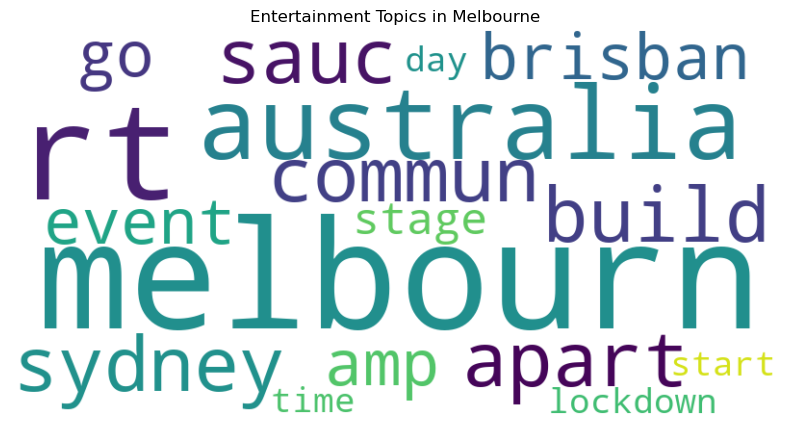

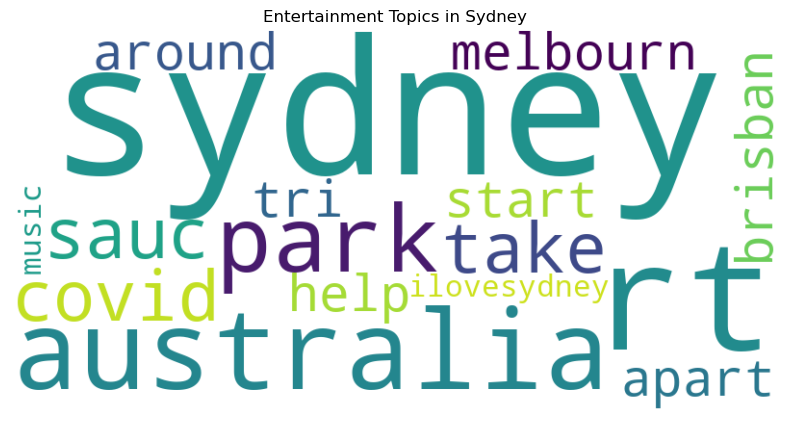

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_word_cloud(topics, title):
    """
    Generate a word cloud based on the topics.
    
    Parameters:
    - topics: Dictionary containing topics and their corresponding words
    - title: Title for the word cloud plot
    """
    words = ' '.join([' '.join(words) for words in topics.values()])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for entertainment topics in Melbourne and Sydney
generate_word_cloud(entertainment_topics_melbourne, 'Entertainment Topics in Melbourne')
generate_word_cloud(entertainment_topics_sydney, 'Entertainment Topics in Sydney')


In [25]:
# Topic modeling for food culture-related posts in Melbourne and Sydney
food_topics_melbourne = perform_lda(food_df[food_df['Location'] == 'Melbourne'])
food_topics_sydney = perform_lda(food_df[food_df['Location'] == 'Sydney'])

food_topics_melbourne, food_topics_sydney

({0: ['melbourn', 'food', 'rt', 'great', 'meal'],
  1: ['melbourn', 'rt', 'great', 'travel', 'new'],
  2: ['melbourn', 'sauc', 'australia', 'sydney', 'brisban'],
  3: ['melbourn', 'best', 'sweat', 'rt', 'eat'],
  4: ['melbourn', 'covid', 'rt', 'get', 'repeat']},
 {0: ['sydney', 'travel', 'australia', 'food', 'rt'],
  1: ['sydney', 'restaur', 'great', 'rt', 'could'],
  2: ['sydney', 'rt', 'australia', 'nsw', 'food'],
  3: ['sydney', 'deliv', 'restaur', 'sweet', 'ad'],
  4: ['sydney', 'sauc', 'australia', 'brisban', 'gourmet']})

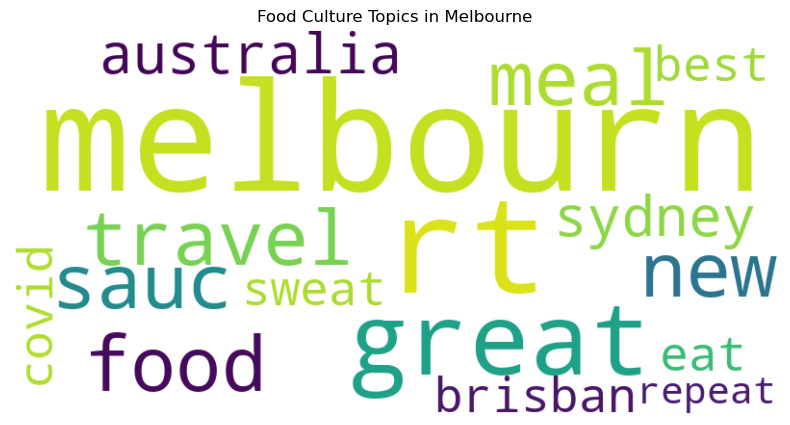

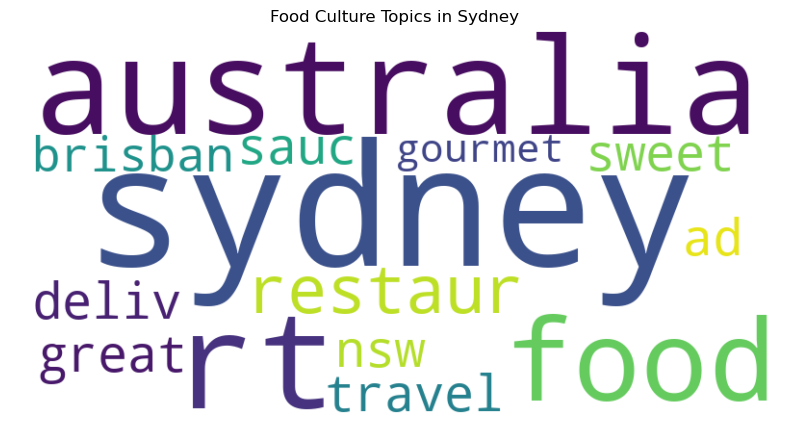

In [26]:
# Generate word clouds for food culture topics in Melbourne and Sydney
generate_word_cloud(food_topics_melbourne, 'Food Culture Topics in Melbourne')
generate_word_cloud(food_topics_sydney, 'Food Culture Topics in Sydney')


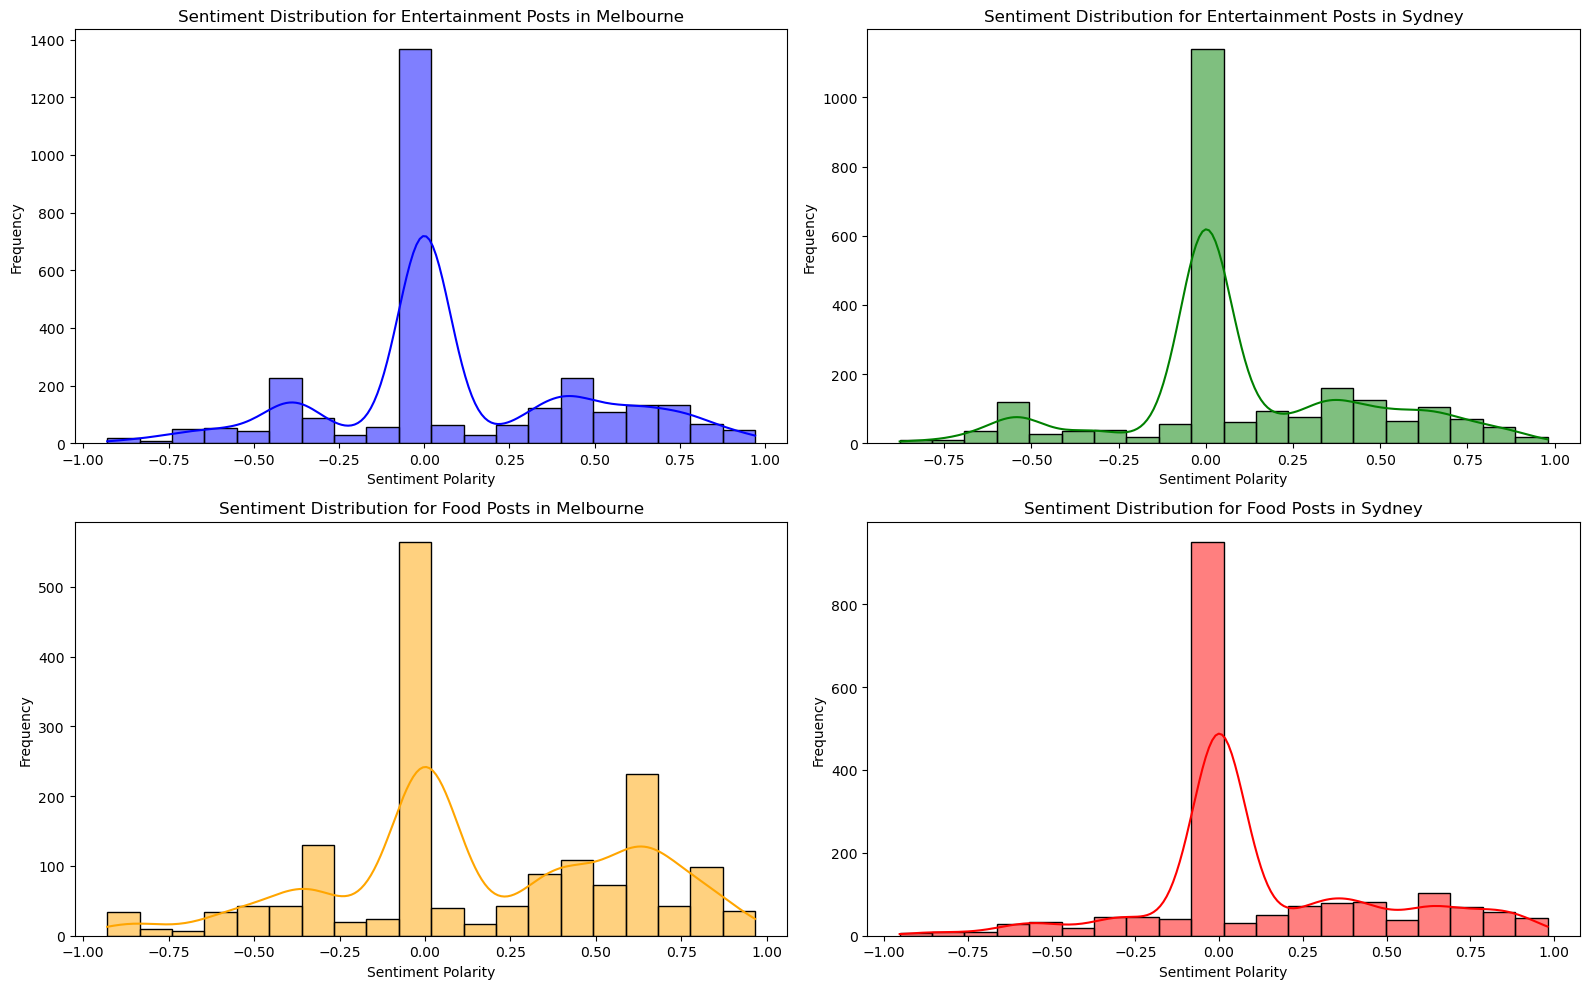

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform sentiment analysis using VADER
def perform_sentiment_analysis_vader(posts):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = []
    for post in posts:
        vs = analyzer.polarity_scores(post)
        sentiment_scores.append(vs['compound'])
    return sentiment_scores

entertainment_posts_melbourne = entertainment_df[entertainment_df['Location'] == 'Melbourne']['Processed_Title']

entertainment_posts_sydney = entertainment_df[entertainment_df['Location'] == 'Sydney']['Processed_Title']
food_posts_melbourne = food_df[food_df['Location'] == 'Melbourne']['Processed_Title']
food_posts_sydney = food_df[food_df['Location'] == 'Sydney']['Processed_Title']

# Sentiment analysis for entertainment posts in Melbourne and Sydney
entertainment_sentiment_scores_melbourne = perform_sentiment_analysis_vader(entertainment_posts_melbourne)
entertainment_sentiment_scores_sydney = perform_sentiment_analysis_vader(entertainment_posts_sydney)

# Sentiment analysis for food culture-related posts in Melbourne and Sydney
food_sentiment_scores_melbourne = perform_sentiment_analysis_vader(food_posts_melbourne)
food_sentiment_scores_sydney = perform_sentiment_analysis_vader(food_posts_sydney)

# Plot the sentiment distributions
plt.figure(figsize=(16, 10))

# Entertainment Posts in Melbourne
plt.subplot(2, 2, 1)
sns.histplot(entertainment_sentiment_scores_melbourne, bins=20, kde=True, color='blue')
plt.title('Sentiment Distribution for Entertainment Posts in Melbourne')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Entertainment Posts in Sydney
plt.subplot(2, 2, 2)
sns.histplot(entertainment_sentiment_scores_sydney, bins=20, kde=True, color='green')
plt.title('Sentiment Distribution for Entertainment Posts in Sydney')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Food Posts in Melbourne
plt.subplot(2, 2, 3)
sns.histplot(food_sentiment_scores_melbourne, bins=20, kde=True, color='orange')
plt.title('Sentiment Distribution for Food Posts in Melbourne')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Food Posts in Sydney
plt.subplot(2, 2, 4)
sns.histplot(food_sentiment_scores_sydney, bins=20, kde=True, color='red')
plt.title('Sentiment Distribution for Food Posts in Sydney')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
